In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/DailyDelhiClimateTest.csv"
df = pd.read_csv(file_path)

# Convert 'date' column to datetime format
df["date"] = pd.to_datetime(df["date"])

QUESTION 1

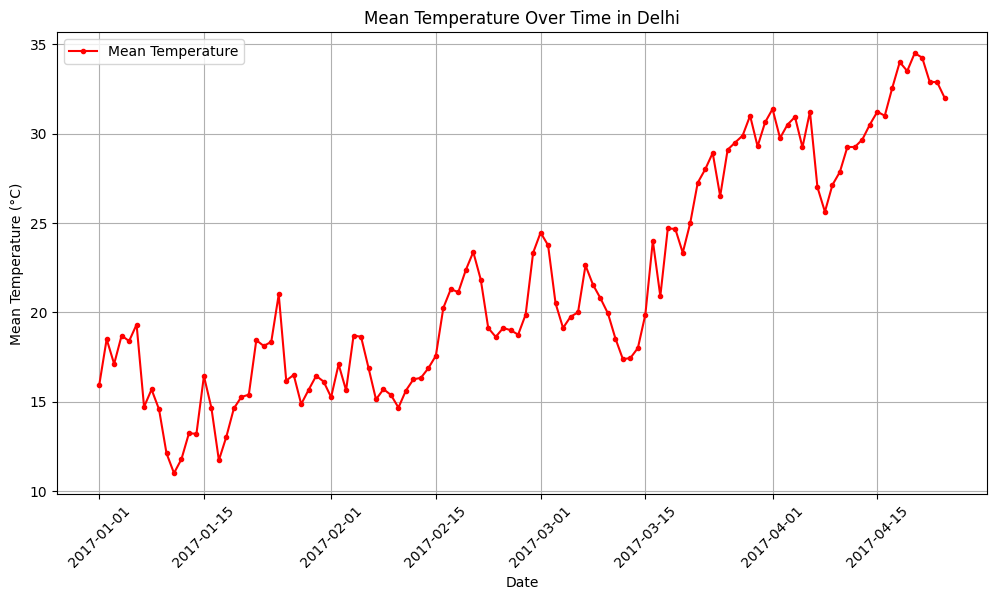

In [ ]:
# Plot time series
plt.figure(figsize=(12, 6))
plt.plot(df["date"], df["meantemp"], color='r', marker='o', linestyle='-', markersize=3, label="Mean Temperature")

# Customizations
plt.xlabel("Date")
plt.ylabel("Mean Temperature (°C)")
plt.title("Mean Temperature Over Time in Delhi")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)

QUESTION 2

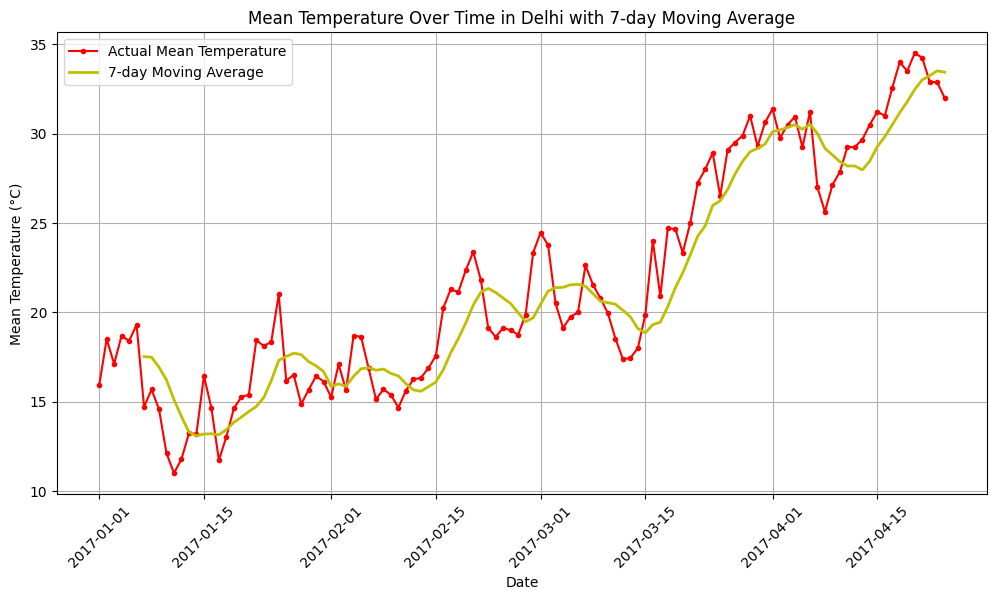

In [ ]:
# Compute 7-day moving average
df["meantemp_ma7"] = df["meantemp"].rolling(window=7).mean()

# Plot time series
plt.figure(figsize=(12, 6))
plt.plot(df["date"], df["meantemp"], color='r', marker='o', linestyle='-', markersize=3, label="Actual Mean Temperature")
plt.plot(df["date"], df["meantemp_ma7"], color='y', linestyle='-', linewidth=2, label="7-day Moving Average")

# Customizations
plt.xlabel("Date")
plt.ylabel("Mean Temperature (°C)")
plt.title("Mean Temperature Over Time in Delhi with 7-day Moving Average")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)

QUESTION 3

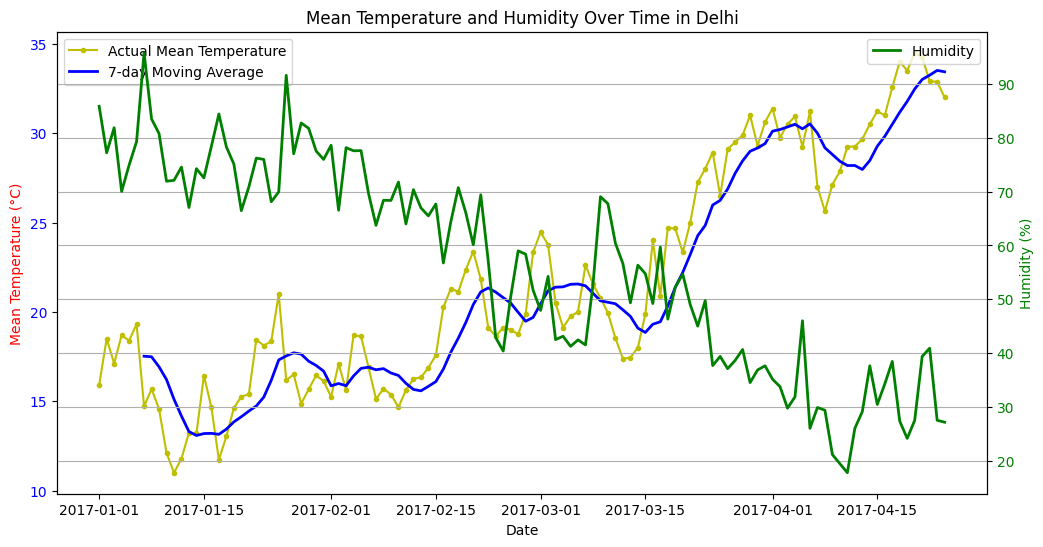

In [ ]:
# Create dual-axis plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot mean temperature on primary y-axis
ax1.set_xlabel("Date")
ax1.set_ylabel("Mean Temperature (°C)", color='r')
ax1.plot(df["date"], df["meantemp"], color='y', marker='o', linestyle='-', markersize=3, label="Actual Mean Temperature")
ax1.plot(df["date"], df["meantemp_ma7"], color='b', linestyle='-', linewidth=2, label="7-day Moving Average")
ax1.tick_params(axis='y', labelcolor='b')
ax1.legend(loc="upper left")

# Create secondary y-axis for humidity
ax2 = ax1.twinx()
ax2.set_ylabel("Humidity (%)", color='g')
ax2.plot(df["date"], df["humidity"], color='g', linestyle='-', linewidth=2, label="Humidity")
ax2.tick_params(axis='y', labelcolor='g')
ax2.legend(loc="upper right")

# Title and grid
plt.title("Mean Temperature and Humidity Over Time in Delhi")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

QUESTION 4

<ipython-input-47-6054edf1e777>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["month"], y=df["meantemp"], palette="viridis")
<ipython-input-47-6054edf1e777>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["month"], y=df["humidity"], palette="viridis_r")


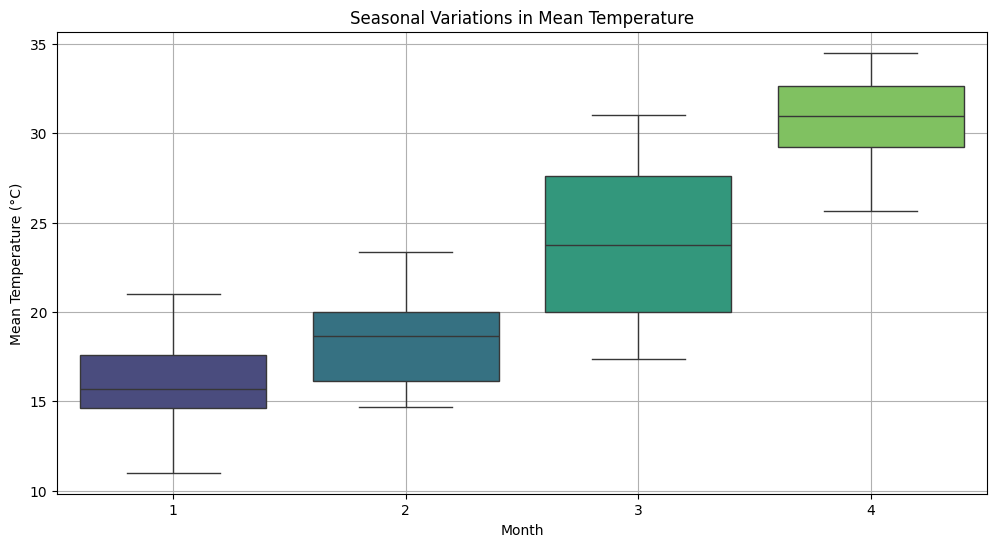

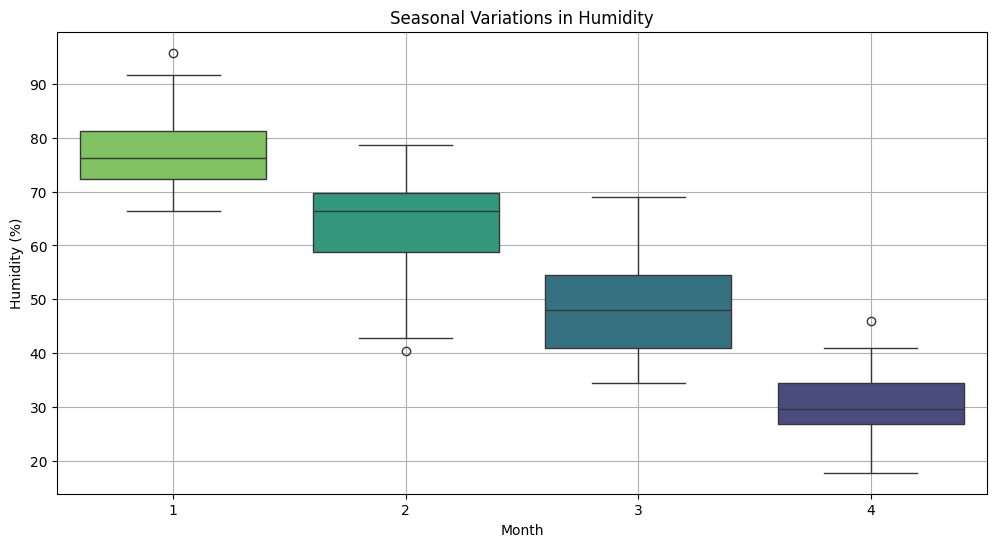

In [ ]:
# Extract month from 'date' column
df["month"] = df["date"].dt.month

# Box plot for seasonal temperature variations
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["month"], y=df["meantemp"], palette="viridis")
plt.xlabel("Month")
plt.ylabel("Mean Temperature (°C)")
plt.title("Seasonal Variations in Mean Temperature")
plt.grid(True)

# Box plot for seasonal humidity variations
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["month"], y=df["humidity"], palette="viridis_r")
plt.xlabel("Month")
plt.ylabel("Humidity (%)")
plt.title("Seasonal Variations in Humidity")
plt.grid(True)

QUESTION 5


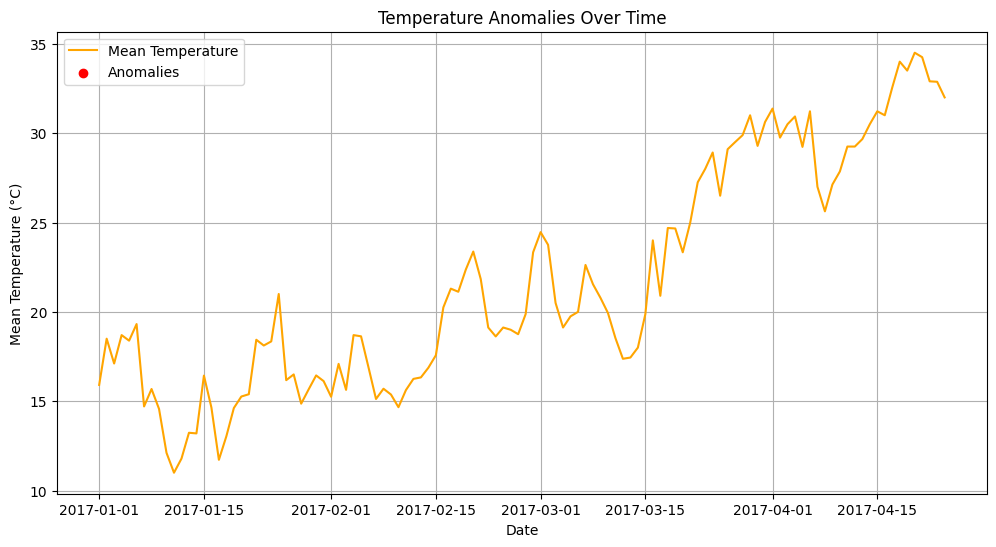

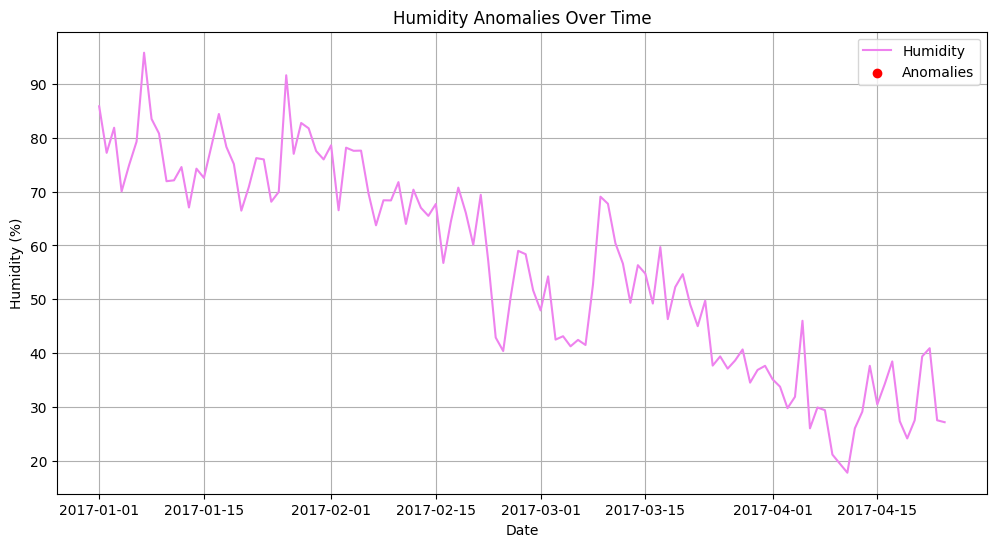

In [ ]:
# Detecting anomalies using IQR method
def detect_anomalies_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Identify temperature and humidity anomalies
temp_anomalies = detect_anomalies_iqr(df, "meantemp")
humidity_anomalies = detect_anomalies_iqr(df, "humidity")

# Plot temperature anomalies
plt.figure(figsize=(12, 6))
plt.plot(df["date"], df["meantemp"], color='orange', label="Mean Temperature")
plt.scatter(temp_anomalies["date"], temp_anomalies["meantemp"], color='r', label="Anomalies", zorder=3)
plt.xlabel("Date")
plt.ylabel("Mean Temperature (°C)")
plt.title("Temperature Anomalies Over Time")
plt.legend()
plt.grid(True)

# Plot humidity anomalies
plt.figure(figsize=(12, 6))
plt.plot(df["date"], df["humidity"], color='violet', label="Humidity")
plt.scatter(humidity_anomalies["date"], humidity_anomalies["humidity"], color='r', label="Anomalies", zorder=3)
plt.xlabel("Date")
plt.ylabel("Humidity (%)")
plt.title("Humidity Anomalies Over Time")
plt.legend()
plt.grid(True)